<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/02_02_maze_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maze solver

In [3]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git
import algorithmic_complexity.mazebuilder as mb
import matplotlib.pyplot as plt

In [17]:
def drawMaze(maze):
  _, ax = plt.subplots(figsize=(18, 18))
  ax.imshow(maze)
  ax.axis("off")

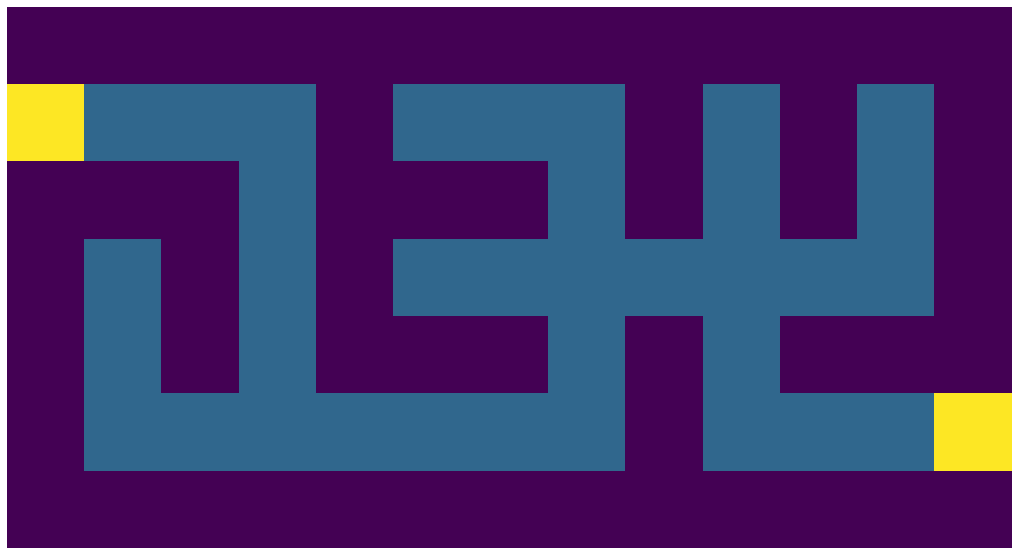

In [19]:
maze = mb.makeMaze(3, 6)
drawMaze(maze)

In [20]:
maze

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])